# Title: Comparing Residential and Commercial Real Estate: Price per Square Foot Analysis

# Introduction

Our project focuses on the extensive Milwaukee real estate dataset spanning from 2002 to 2018, sourced from the official Milwaukee government website. We aim to explore the variations between Residential and Commercial properties in terms of their price per square foot, addressing the following question: "Is there a significant difference in the price per square foot between Residential and Commercial properties"

For our analysis, we will emphasize two primary parameters:

Location Parameter: Mean Price per Square Foot 

Scale Parameter: Median and Mean Price per Square Foot


# Preliminary Results

In [17]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
housing_data <- read.csv("https://raw.githubusercontent.com/mhuang306/STAT-201-proj/main/2002-2018-property-sales-data%5B1%5D.csv")

Here, we're importing any libraries that might be necessary for this assignment and reading the csv file off of our group's Github repository

In [18]:
head(housing_data)

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Commercial,3230461110,2628 N 6TH ST,,6,6258,Commercial Exempt,,2,1880,0,1840,1,0,0,0,12750,2002-01,15900
2,Commercial,3590192000,1363 N PROSPECT AV,,3,6262,Mansions With Commercial Usage,,2,1876,0,6377,1,0,0,0,11840,2002-01,850000
3,Commercial,4161194000,617 S 94TH ST,,10,6272,Service Building,,1,1954,0,5022,1,0,0,0,9700,2002-01,119000
4,Commercial,1719836000,3624 W SILVER SPRING DR,,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1955,0,6420,1,0,0,0,8792,2002-01,210000
5,Commercial,3480290000,3830 W LISBON AV,,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1909,0,5956,1,0,0,0,4840,2002-01,48500
6,Commercial,4069983200,320 N 76TH ST,,10,6272,Strip Shopping Center,,1,1954,0,14200,1,0,0,0,16696,2002-01,885000


Here we do the cleaning for the data, removing NA values and zeroes, correcting column types, and stripping it down to just our potential variables of interest

In [19]:
housing_data <- housing_data |>
    select(PropType, Fin_sqft, Sale_price) |>
    filter(!is.na(PropType))|>
    filter(PropType == "Residential" | PropType == "Commercial") |>
    filter(Fin_sqft != 0, Sale_price != 0) |>
    mutate(Price_per_sqft = Sale_price/Fin_sqft)

head(housing_data)

,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Commercial,1840,15900,8.641304
2,Commercial,6377,850000,133.291516
3,Commercial,5022,119000,23.695739
4,Commercial,6420,210000,32.710280
5,Commercial,5956,48500,8.143049
6,Commercial,14200,885000,62.323944


Then, we separate the Residential and Commerical data, and plot the histograms of the Price_per_sqft data

In [44]:
Residential_data <- housing_data |>
filter(PropType == "Residential" & Price_per_sqft < 1000)|>
mutate(Price_per_sqft = round(Price_per_sqft, 0))
Commerical_data <- housing_data |>
filter(PropType == "Commercial" & Price_per_sqft < 1000) |>
mutate(Price_per_sqft = round(Price_per_sqft, 0))


head(Residential_data)
head(Commerical_data)

,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Residential,3476,42000,12
2,Residential,1992,145000,73
3,Residential,2339,30000,13
4,Residential,2329,66500,29
5,Residential,7450,150500,20
6,Residential,2462,75000,30


,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Commercial,1840,15900,9
2,Commercial,6377,850000,133
3,Commercial,5022,119000,24
4,Commercial,6420,210000,33
5,Commercial,5956,48500,8
6,Commercial,14200,885000,62


In [45]:
summary_data <- housing_data |>
group_by(PropType) |>
summarize(mean = mean(Price_per_sqft),
         median = median(Price_per_sqft))
summary_data

PropType,mean,median
<chr>,<dbl>,<dbl>
Commercial,204.23761,49.20415
Residential,96.42926,98.19639


In [46]:
Res_price_per_sqft_dist <- Residential_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 0.5) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Residential Properties")

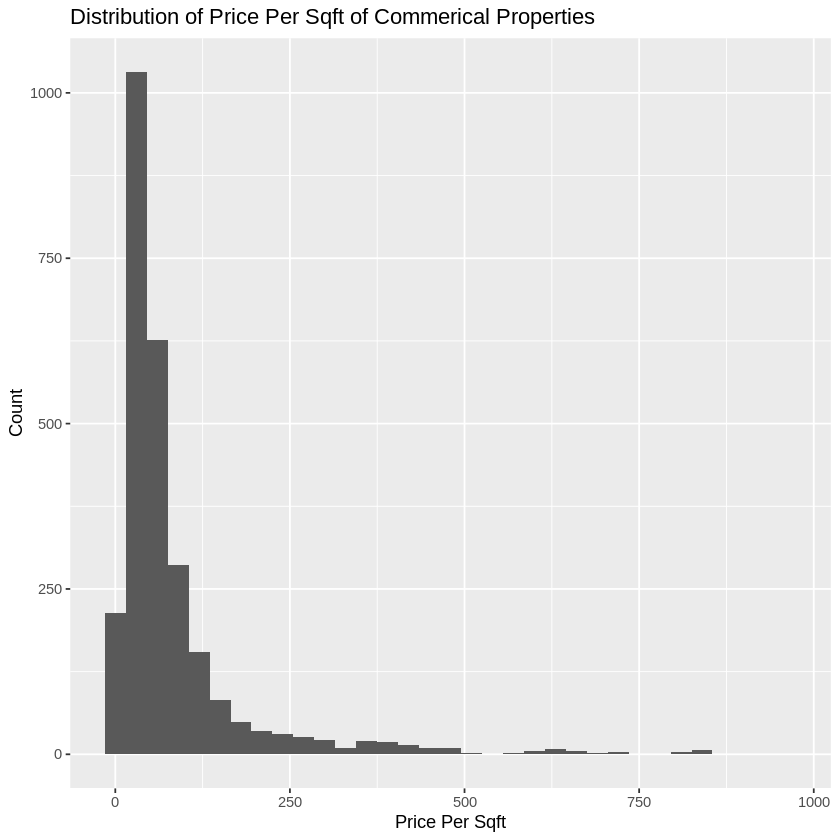

In [47]:

Com_price_per_sqft_dist <- Commerical_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 30) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Commerical Properties")


Com_price_per_sqft_dist


# Methods: Plan



The credibility of this report stems from several key elements. Firstly, the dataset used in our analysis is sourced directly from the official Milwaukee government website, ensuring data integrity and reliability. We are committed to robust and transparent data analysis, with a focus on providing reliable results through appropriate statistical testing. Additionally, we welcome feedback from peers and mentors to further enhance the report's trustworthiness.

Hypothesis Testing: We will conduct a hypothesis test to evaluate whether there is a significant difference in the mean and median of price per square foot between Residential and Commercial properties. We will compare both bootstrapping and asymptotic methods to ensure robustness and comprehensiveness in our findings.

Confidence Intervals: Alongside hypothesis testing, we will calculate confidence intervals for the mean price per square foot for both property types. These intervals will provide a range of values within which we can be confident the true population parameter lies, offering a more complete perspective on property values.

We expect that our analysis will reveal insights into the pricing disparities between Residential and Commercial properties. If a statistically significant difference in mean price per square foot exists, this finding can have substantial implications for real estate investors, property developers, and city planners. Stakeholders may use this information to make more informed decisions about property investments, zoning regulations, and urban development strategies.


# What future questions could this lead to?
The results of this study may lead to several future research questions and avenues for exploration, including:

What are the key drivers behind the observed variations in property values, such as location, property size, neighborhood amenities, or economic factors?

What are the socioeconomic and equity implications of the disparities in property prices, particularly concerning access to housing and business opportunities?

How can city planners and policymakers adapt urban development policies to promote balanced and inclusive communities based on the insights from this analysis?

These questions reflect the research expectations and potential avenues for further investigation arising from the study's findings.

In summary, the results of this analysis have the potential to spark a broader discussion and further research into the dynamics of the real estate market, property investment strategies, and their broader impacts on urban development and socioeconomic equity.

# References


Dataset:
https://www.kaggle.com/datasets/agungpambudi/property-sales-data-real-estate-trends/


Other:
Clark, Stephen and Lomax, Nik. "Rent/price ratio for English housing sub-markets using matched sales and rental data." Area, vol. 52, no. 1, 2020, https://doi.org/10.1111/area.12555

Gougeon, Annik and Moussouni, Oualid. "Residential real estate sales in 2018: Characteristics of properties sold." Statistics Canada, 11 August 2021, https://publications.gc.ca/collections/collection_2021/statcan/46-28-0001/CS462-80001-2021-1-eng.pdf.

